1. **The idea is to create groups of SKUs that share similar characteristicsand will be assigned to the same cluster. To this end, we apply the k-means clustering methods on the 44 SKUs in our dataset.**

2. **our objective is to divide the SKUs into k clusters and
subsequently estimate a demand prediction model (e.g., OLS) for each cluster**

**note** learning from Demand prediction in retail book by Maxime C.Cohen
Paul-Emile Gras,
Arthur Pentecoste,
Renyu Zhang,

In [1]:
import pandas as pd
df = pd.read_csv("data_processed.csv")
df

,week,sku,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,...,color_white,vendor_2,vendor_3,vendor_4,vendor_5,vendor_6,vendor_7,vendor_8,vendor_9,vendor_10
0,2016-11-14,1,110.0,10.24,9.86,10.16,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2016-11-21,1,127.0,8.27,10.24,9.86,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2016-11-28,1,84.0,8.83,8.27,10.24,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2016-12-05,1,87.0,8.98,8.83,8.27,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2016-12-12,1,64.0,10.40,8.98,8.83,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,2018-08-27,44,20.0,53.99,42.38,43.99,0,2,0,0,...,0,0,0,0,0,1,0,0,0,0
4308,2018-09-03,44,14.0,52.99,53.99,42.38,0,2,0,0,...,0,0,0,0,0,1,0,0,0,0
4309,2018-09-10,44,22.0,44.99,52.99,53.99,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
4310,2018-09-17,44,28.0,42.99,44.99,52.99,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0


In [2]:
res = pd.DataFrame(index=['R2'])
res

""
R2


In [14]:
skuSet = list(df.sku.unique())
skuData={}

colnames = [i for i in df.columns if i not in ['week', 'weekly_sales', 'sku']]

for i in skuSet:
    df_i = df[df.sku == i]
    skuData[i] = {'X': df_i[colnames].values,
                'y': df_i.weekly_sales.values}

In [40]:
skuData[1]["y"]

array([110., 127.,  84.,  87.,  64., 128.,  23., 154.,  85.,  11.,  19.,
        17.,  17.,  17.,  13.,   8.,   8.,   5.,   6.,   9.,   6.,   4.,
        13.,   7.,   9.,   4.,   5.,   9.,   7.,   8.,  11.,   5.,   8.,
         7.,  10.,   7.,   5.,   5.,  13.,   4.,   7.,  10.,   7.,   5.,
         6.,  11.,  12.,   4.,   9.,  11.,   8.,   8.,  17.,   8.,   7.,
         7.,   9.,   3.,  10.,   7.,  13.,  11.,   6.,   5.,   7.,   8.,
         3.,  10.,  14.,  29.,  26.,  16.,  28.,  13.,  15.,  27.,  13.,
        26.,  20.,  23.,  21.,  21.,  22.,  21.,  23.,  28.,  16.,  32.,
        17.,  15.,  18.,  10.,  16.,  16.,  15.,  21.,  32.,  19.])

In [42]:
import numpy as np
np.split(skuData[1]['y'], [68])

[array([110., 127.,  84.,  87.,  64., 128.,  23., 154.,  85.,  11.,  19.,
         17.,  17.,  17.,  13.,   8.,   8.,   5.,   6.,   9.,   6.,   4.,
         13.,   7.,   9.,   4.,   5.,   9.,   7.,   8.,  11.,   5.,   8.,
          7.,  10.,   7.,   5.,   5.,  13.,   4.,   7.,  10.,   7.,   5.,
          6.,  11.,  12.,   4.,   9.,  11.,   8.,   8.,  17.,   8.,   7.,
          7.,   9.,   3.,  10.,   7.,  13.,  11.,   6.,   5.,   7.,   8.,
          3.,  10.]),
 array([14., 29., 26., 16., 28., 13., 15., 27., 13., 26., 20., 23., 21.,
        21., 22., 21., 23., 28., 16., 32., 17., 15., 18., 10., 16., 16.,
        15., 21., 32., 19.])]

In [68]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

scaler = MinMaxScaler()

In [53]:
X_dict = {}
y_dict = {}

y_train = []
y_test = []

for i in skuSet:
    X_train_i,X_test_i = np.split(skuData[i]["X"], [68]) #split for X
    y_train_i,y_test_i = np.split(skuData[i]["y"], [68]) #split for y 

    X_dict[i] = {'train': X_train_i, 'test': X_test_i} #filling dictionary
    y_dict[i] = {'train': y_train_i, 'test': y_test_i}
    
    y_train += list(y_train_i) #creating the complete testing array
    y_test += list(y_test_i) #creating the complete training array
    
## Centralized ##
X_cen_train = X_dict[skuSet[0]]['train'] #initialization with item 0
X_cen_test = X_dict[skuSet[0]]['test']


for i in skuSet[1:]:
    X_cen_train = np.concatenate((X_cen_train, X_dict[i]['train']), axis=0)
    X_cen_test = np.concatenate((X_cen_test, X_dict[i]['test']), axis=0)

In [54]:
X_dict_subsplit = {} 
y_dict_subsplit = {} 

y_validation = [] 
y_subtrain = [] 

for i in skuSet:

    X_train_i,X_test_i = np.split(X_dict[i]["train"], [48]) #split for X
    y_train_i,y_test_i = np.split(y_dict[i]["train"], [48]) #split for y 

    X_dict_subsplit[i] = {'train': X_train_i, 'test': X_test_i} #filling dictionary
    y_dict_subsplit[i] = {'train': y_train_i, 'test': y_test_i}

    y_subtrain += list(y_train_i) # testing array
    y_validation += list(y_test_i) # training array

## Centralized data
X_cen_subtrain = X_dict_subsplit[skuSet[0]]['train'] #initialization with item 0 #X_cen_train_sub
X_cen_validation = X_dict_subsplit[skuSet[0]]['test'] #X_cen_test_sub
for i in skuSet[1:]: #Iteration over items
    X_cen_subtrain = np.concatenate((X_cen_subtrain, X_dict_subsplit[i]['train']), axis = 0) #Bringing together the training set
    X_cen_validation = np.concatenate((X_cen_validation, X_dict_subsplit[i]['test']), axis = 0)

In [57]:
# X_dict_subsplit[skuSet[1]]['train']

array([[65.99, 64.99, 62.93, ...,  0.  ,  0.  ,  0.  ],
       [63.99, 65.99, 64.99, ...,  0.  ,  0.  ,  0.  ],
       [59.49, 63.99, 65.99, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [65.99, 64.99, 56.73, ...,  0.  ,  0.  ,  0.  ],
       [57.07, 65.99, 64.99, ...,  0.  ,  0.  ,  0.  ],
       [57.07, 57.07, 65.99, ...,  0.  ,  0.  ,  0.  ]])

## Clustering

## 1) K-Means

## a) Just with sales and prices 

In [61]:
X_dict_subsplit[1]['train']

array([[10.24,  9.86, 10.16, ...,  0.  ,  0.  ,  0.  ],
       [ 8.27, 10.24,  9.86, ...,  0.  ,  0.  ,  0.  ],
       [ 8.83,  8.27, 10.24, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [26.49, 25.49, 26.49, ...,  0.  ,  0.  ,  0.  ],
       [25.98, 26.49, 25.49, ...,  0.  ,  0.  ,  0.  ],
       [27.49, 25.98, 26.49, ...,  0.  ,  0.  ,  0.  ]])

In [62]:
y_dict_subsplit[1]['train']

array([110., 127.,  84.,  87.,  64., 128.,  23., 154.,  85.,  11.,  19.,
        17.,  17.,  17.,  13.,   8.,   8.,   5.,   6.,   9.,   6.,   4.,
        13.,   7.,   9.,   4.,   5.,   9.,   7.,   8.,  11.,   5.,   8.,
         7.,  10.,   7.,   5.,   5.,  13.,   4.,   7.,  10.,   7.,   5.,
         6.,  11.,  12.,   4.])

In [86]:
# np.concatenate(( 
#             np.array([[i] for i in X_dict_subsplit[1]['train'][:,0]]), 
#             np.array([[i] for i in y_dict_subsplit[1]['train']])),
#             axis=1)

np.mean(np.concatenate(( 
            np.array([[i] for i in X_dict_subsplit[1]['train'][:,0]]), 
            np.array([[i] for i in y_dict_subsplit[1]['train']])),
            axis=1), axis=0)

array([22.45041667, 25.02083333])

In [89]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

num_clusters = 0
maximum_score = 100
oos_r2 = 0
z = 15
X_clus = np.zeros((len(skuSet), 2))
count = 0
for sku in skuSet:
    X_clus[count, :] = np.mean(np.concatenate(( 
        np.array([[i] for i in X_dict_subsplit[sku]['train'][:,0]]), 
        np.array([[i] for i in y_dict_subsplit[sku]['train']])),
        axis=1),axis = 0)
    count += 1

X_clus = scaler.fit_transform(X_clus)
kmeans = KMeans(n_clusters=z, random_state=0).fit(X_clus)

C:\Users\kamal\anaconda3\anaconda-py\envs\data-science\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kamal\anaconda3\anaconda-py\envs\data-science\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


To avoid memory leak in KMeans read : https://stackoverflow.com/a/73445664/5475733

In [90]:
X_clus

array([[8.67815054e-02, 1.85300062e-02],
       [3.11654695e-01, 0.00000000e+00],
       [5.27484752e-01, 2.70145879e-03],
       [6.23143002e-02, 2.16116703e-03],
       [1.92212614e-02, 1.64088608e-03],
       [1.38876080e-01, 1.27468833e-02],
       [9.79781605e-03, 6.18534008e-02],
       [5.87166572e-01, 2.78750525e-02],
       [8.04441819e-01, 7.41000140e-02],
       [1.00000000e+00, 5.38290677e-03],
       [1.32493951e-01, 3.16771056e-02],
       [2.86916517e-01, 3.85007904e-02],
       [1.11596935e-01, 1.04656515e-02],
       [1.09508778e-01, 6.28939627e-02],
       [4.96332356e-02, 2.60400616e-01],
       [9.23828041e-02, 9.09291017e-02],
       [1.59723180e-01, 2.52136154e-02],
       [5.30467833e-01, 7.20389010e-03],
       [4.96816066e-01, 3.43185320e-02],
       [3.98900895e-02, 9.51713926e-02],
       [1.20717318e-01, 3.46186941e-03],
       [3.55188659e-02, 1.02455326e-01],
       [4.69579706e-02, 1.54763572e-01],
       [5.47413158e-02, 2.44932263e-02],
       [2.428061

In [99]:
# Loop
y_clus_pred = []
y_clus_test = []

for j in range(z):
    clus_items = list(np.where(kmeans.labels_ == j)[0])
    
    X_clus_j_train = X_dict[skuSet[clus_items[0]]]['train']
    X_clus_j_test = X_dict[skuSet[clus_items[0]]]['test']
    
    y_clus_j_train = list(y_dict[skuSet[clus_items[0]]]['train'])
    y_clus_j_test = list(y_dict[skuSet[clus_items[0]]]['test'])
    
    for idx in clus_items[1:]:
        sku = skuSet[idx]
        
        X_clus_j_train = np.concatenate((X_clus_j_train, X_dict[sku]['train']), axis=0)
        X_clus_j_test = np.concatenate((X_clus_j_test, X_dict[sku]['test']), axis=0)
        
        y_clus_j_train += list(y_dict[sku]['train'])
        y_clus_j_test += list(y_dict[sku]['test'])
        
    model_clus_j = LinearRegression().fit(X_clus_j_train, y_clus_j_train)
    y_clus_pred += list(model_clus_j.predict(X_clus_j_test))
    y_clus_test += y_clus_j_test

#Results
print('OOS R2:',r2_score(y_clus_test, y_clus_pred))

OOS R2: 0.5349073764694932


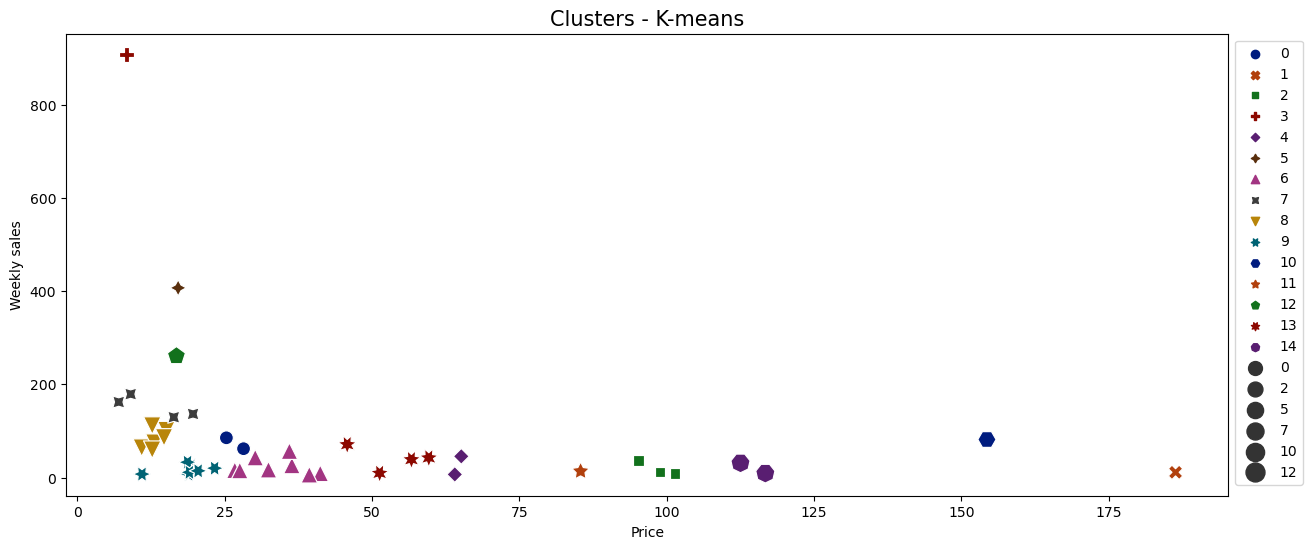

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
## Build dataframe
list_prices=[]
list_sales=[]
for sku in skuSet:
    list_prices.append(np.mean(X_dict[sku]['train'][:,0], axis = 0))
    list_sales.append(np.mean([ [i] for i in y_dict[sku]['train'] ]))
df_clus=pd.DataFrame()
df_clus['price']=list_prices
df_clus['weekly_sales']=list_sales
df_clus['Cluster label']=labels=kmeans.labels_
## Plot
plt.figure(figsize=(15,6))
graph = sns.scatterplot(data=df_clus, x='price', y='weekly_sales',
                        hue='Cluster label', style='Cluster label',
                        palette='dark',
                        size='Cluster label', sizes=(100, 200))
plt.title('Clusters - K-means', fontsize=15)
plt.xlabel('Price')
plt.ylabel('Weekly sales')
plt.legend(bbox_to_anchor=(1,1))
plt.show()